In [10]:
! pip install pandas scikit-learn matplotlib

### Model Interpretation

Now that we have the intercept and slope, let's interpret what they mean in the context of our problem (Hours Studied vs. Scores).

#### Intercept

The **intercept** represents the predicted value of the dependent variable (Scores) when the independent variable (Hours Studied) is zero. In our case, an intercept of approximately `10.029` suggests that a student who studies 0 hours might still achieve a score of around 10. This could be due to prior knowledge, random chance, or other factors not captured by our simple model. It's important to consider if studying 0 hours is a realistic scenario and if extrapolating the model to this point makes practical sense for your specific data.

#### Slope

The **slope** indicates the change in the dependent variable (Scores) for every one-unit increase in the independent variable (Hours Studied). A slope of approximately `7.945` means that for every additional hour a student studies, their predicted score increases by about `7.945` points. This coefficient quantifies the strength and direction of the linear relationship between studying hours and scores, suggesting a positive correlation: more study hours generally lead to higher scores.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Scores': [10, 20, 30, 40, 50, 55, 65, 75, 85, 95, 100, 105, 115, 120, 130, 135, 145, 150, 160, 165]
}
df = pd.DataFrame(data)
print(df.head())

   Hours  Scores
0      1      10
1      2      20
2      3      30
3      4      40
4      5      50


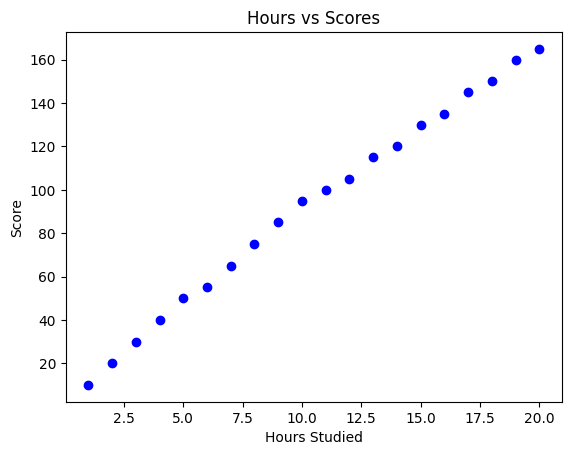

In [13]:
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [14]:
X = df[['Hours']]
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 28.136137879959037
R2 Score: 0.9931453642013043


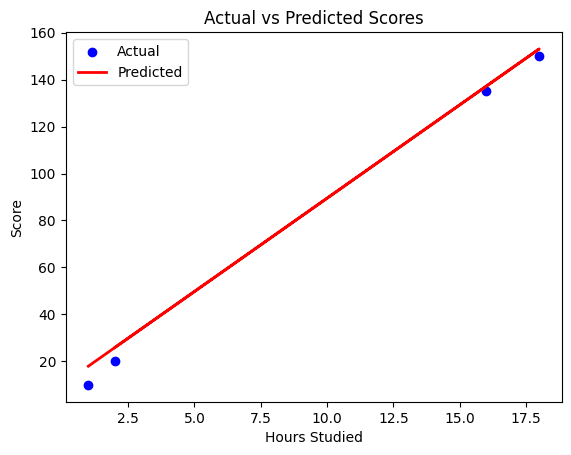

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()

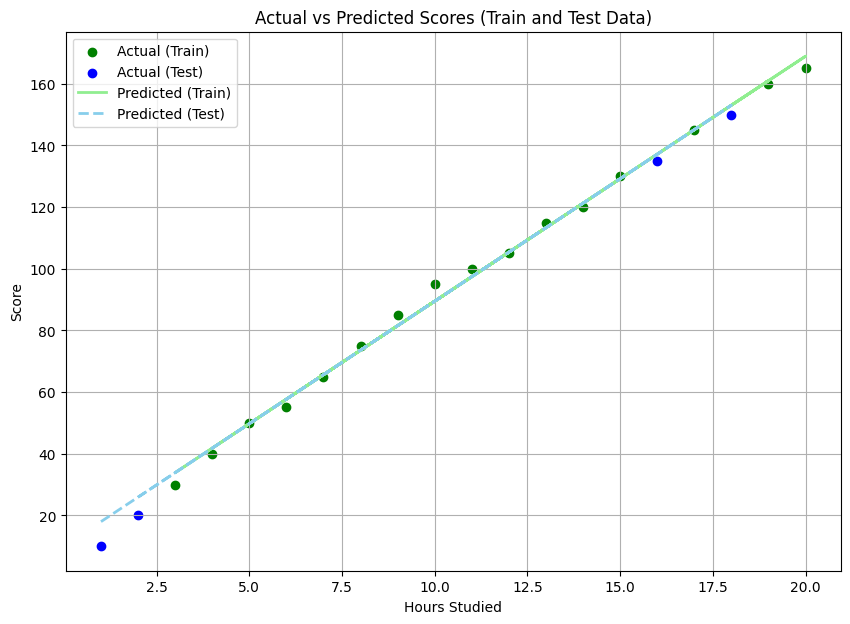

In [21]:
plt.figure(figsize=(10, 7))

# Plot actual training data
plt.scatter(X_train, y_train, color='green', label='Actual (Train)')

# Plot actual test data
plt.scatter(X_test, y_test, color='blue', label='Actual (Test)')

# Plot predicted line for training data
plt.plot(X_train, model.predict(X_train), color='lightgreen', linestyle='-', linewidth=2, label='Predicted (Train)')

# Plot predicted line for test data
plt.plot(X_test, y_pred, color='skyblue', linestyle='--', linewidth=2, label='Predicted (Test)')

plt.title('Actual vs Predicted Scores (Train and Test Data)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

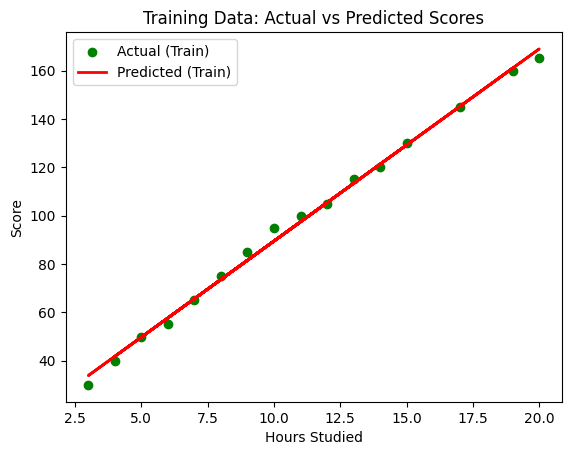

In [18]:
plt.scatter(X_train, y_train, color='green', label='Actual (Train)')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Predicted (Train)')
plt.title('Training Data: Actual vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()

In [22]:
print(f"Model Intercept: {model.intercept_}")
print(f"Model Slope: {model.coef_[0]}")

Model Intercept: 10.029407329211267
Model Slope: 7.94525712562208
